# Ex3: SVD

## Câu 1: 
- Cho tập tin ex3.csv. Đọc tập tin vào dataframe
- Từ datafarme, sử dụng SVD để phân tích thành các thành phần U,s,VT
- Tạo dataframe mới từ các thành phần đã phân tích, nhưng có nhận xét và rút thành phần nếu có thể. 
- Tìm error nếu có rút thành phần

## Câu 2: 
- Cho tập tin iris.csv, đọc dữ liệu ra dataframe và chỉ lấy 4 cột đầu
- Từ datafarme, sử dụng SVD để phân tích thành các thành phần U, s, VT
- Tạo dataframe mới từ các thành phần đã phân tích, nhưng có nhận xét và rút thành phần nếu có thể. 
- Tìm error nếu có rút thành phần
- Tái cấu trúc dataframe theo U, s, VT (giữ nguyên tất cả các thành phần)

## Câu 3: 
- Tạo ma trận A(4x6) với các giá trị ngẫu nhiên từ 1 đến 10 
- Tạo ma trận giả đảo B từ ma trận A

## Câu 1: Gợi ý

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("ex3.csv", index_col=0)
df

,post1,post2,post3,post4
word,,,,
ice,4,4,6,2
snow,6,1,0,5
tahoe,3,0,0,5
goal,0,6,5,1
puck,0,4,5,0


In [3]:
# Decomposition
U, s, VT = np.linalg.svd(df)

In [4]:
U

array([[-0.62610079,  0.01852561,  0.6259093 ,  0.23487748, -0.40090488],
       [-0.35134826, -0.67829097,  0.0779915 , -0.56006159,  0.311005  ],
       [-0.21940528, -0.51980146, -0.50346468,  0.6484906 , -0.08747016],
       [-0.51965373,  0.37026259, -0.59046979, -0.38005352, -0.31586445],
       [-0.40788911,  0.36371724, -0.00485878,  0.25726028,  0.79695031]])

In [5]:
s

array([13.3221948 ,  9.2609512 ,  2.41918664,  1.37892883])

In [6]:
VT

array([[-0.39563365, -0.57086917, -0.6301003 , -0.34721178],
       [-0.59983555,  0.33174302,  0.4082791 , -0.60286986],
       [ 0.60400142, -0.40535325,  0.32193174, -0.60599586],
       [-0.34475152, -0.63225288,  0.57675103,  0.38569539]])

In [7]:
c_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
V_df = pd.DataFrame(VT, columns=c_names)
V_df

,post1,post2,post3,post4
0,-0.395634,-0.570869,-0.630100,-0.347212
1,-0.599836,0.331743,0.408279,-0.602870
2,0.604001,-0.405353,0.321932,-0.605996
3,-0.344752,-0.632253,0.576751,0.385695


- σ1 và σ2 có cường độ lớn hơn σ3 và σ4, chỉ ra rằng các giá trị trong hai hàng đầu tiên của V quan trọng hơn nhiều so với các giá trị trong hai giá trị cuối cùng. Trong thực tế, chúng ta có thể tái tạo df chỉ bằng hai hàng đầu tiên của V và hai cột đầu tiên của U:

In [8]:
A_approx = np.matrix(U[:, :2]) * np.diag(s[:2]) * np.matrix(VT[:2, :])

print("A calculated using only the first two components:\n")
print(pd.DataFrame(A_approx, index=words, columns=c_names))
print("\nError from actual value:\n")
print(df - A_approx)

A calculated using only the first two components:

          post1     post2     post3     post4
ice    3.197084  4.818556  5.325736  2.792675
snow   5.619793  0.588201  0.384675  5.412204
tahoe  4.043943  0.071665 -0.123639  3.917015
goal   0.682117  5.089628  5.762122  0.336491
puck   0.129398  4.219523  4.799185 -0.143946

Error from actual value:

          post1     post2     post3     post4
word                                         
ice    0.802916 -0.818556  0.674264 -0.792675
snow   0.380207  0.411799 -0.384675 -0.412204
tahoe -1.043943 -0.071665  0.123639  1.082985
goal  -0.682117  0.910372 -0.762122  0.663509
puck  -0.129398 -0.219523  0.200815  0.143946


In [9]:
VT

array([[-0.39563365, -0.57086917, -0.6301003 , -0.34721178],
       [-0.59983555,  0.33174302,  0.4082791 , -0.60286986],
       [ 0.60400142, -0.40535325,  0.32193174, -0.60599586],
       [-0.34475152, -0.63225288,  0.57675103,  0.38569539]])

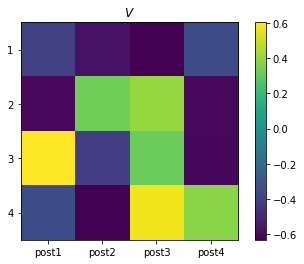

In [10]:
import matplotlib.pyplot as plt

plt.imshow(VT, interpolation='none')

plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.set_yticklabels(range(1, len(words) + 1))

plt.title("$V$")
plt.colorbar()


## Câu 2: Gợi ý
- Cho tập tin iris.csv, đọc dữ liệu ra dataframe và chỉ lấy 4 cột đầu
- Từ datafarme, sử dụng SVD để phân tích thành các thành phần U, s, VT
- Tạo dataframe mới từ các thành phần đã phân tích, nhưng có nhận xét và rút thành phần nếu có thể. 
- Tìm error nếu có rút thành phần
- Tái cấu trúc dataframe theo U, s, VT (giữ nguyên tất cả các thành phần)

In [11]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# Decomposition
U, s, VT = np.linalg.svd(X)

In [14]:
U

array([[-6.16171172e-02,  1.29969428e-01, -5.58364155e-05, ...,
        -9.34637342e-02, -9.60224157e-02, -8.09922905e-02],
       [-5.80722977e-02,  1.11371452e-01,  6.84386629e-02, ...,
         3.66755322e-02, -3.24463474e-02,  1.27273399e-02],
       [-5.67633852e-02,  1.18294769e-01,  2.31062793e-03, ...,
         3.08252776e-02,  1.95234663e-01,  1.35567696e-01],
       ...,
       [-9.40702260e-02, -4.98348018e-02, -4.14958083e-02, ...,
         9.81822841e-01, -2.17978813e-02, -8.85972146e-03],
       [-9.48993908e-02, -5.62107520e-02, -2.12386574e-01, ...,
        -2.14264126e-02,  9.42038920e-01, -2.96933496e-02],
       [-8.84882764e-02, -5.16210172e-02, -9.51442925e-02, ...,
        -8.52768485e-03, -3.02139863e-02,  9.73577349e-01]])

In [15]:
s

array([95.95066751, 17.72295328,  3.46929666,  1.87891236])

In [16]:
VT

array([[-0.75116805, -0.37978837, -0.51315094, -0.16787934],
       [ 0.28583096,  0.54488976, -0.70889874, -0.34475845],
       [ 0.49942378, -0.67502499, -0.05471983, -0.54029889],
       [ 0.32345496, -0.32124324, -0.48077482,  0.74902286]])

- σ1 và σ2 có cường độ lớn hơn σ3 và σ4, chỉ ra rằng các giá trị trong hai hàng đầu tiên của V quan trọng hơn nhiều so với các giá trị trong hai giá trị cuối cùng. Trong thực tế, chúng ta có thể tái tạo df chỉ bằng hai hàng đầu tiên của V và hai cột đầu tiên của U:

In [17]:
# Using 2 first component
X1 = np.matrix(U[:, :2]) * np.diag(s[:2]) * np.matrix(VT[:2, :])
X1[0:5]


matrix([[5.09945346, 3.50050812, 1.40094556, 0.19840569],
        [4.74974728, 3.19172985, 1.46006954, 0.25494146],
        [4.69047924, 3.2108907 , 1.30863935, 0.1915549 ],
        [4.61834831, 3.08439659, 1.46266616, 0.26731753],
        [5.07896131, 3.5005194 , 1.36352353, 0.18323972]])

In [18]:
X1.shape

(150, 4)

In [19]:
print("A calculated using only the first two components:\n")
Xnew = pd.DataFrame(X1, index = X.index, columns=X.columns)
print(Xnew.head())

A calculated using only the first two components:

   sepal_length  sepal_width  petal_length  petal_width
0      5.099453     3.500508      1.400946     0.198406
1      4.749747     3.191730      1.460070     0.254941
2      4.690479     3.210891      1.308639     0.191555
3      4.618348     3.084397      1.462666     0.267318
4      5.078961     3.500519      1.363524     0.183240


In [20]:
print("\nError from actual value:\n")
print((X - X1).head())


Error from actual value:

   sepal_length  sepal_width  petal_length  petal_width
0      0.000547    -0.000508     -0.000946     0.001594
1      0.150253    -0.191730     -0.060070    -0.054941
2      0.009521    -0.010891     -0.008639     0.008445
3     -0.018348     0.015603      0.037334    -0.067318
4     -0.078961     0.099481      0.036476     0.016760


In [21]:
# Reconstruct dataframe
Sigma = np.zeros((X.shape[0], X.shape[1]))
Sigma[:X.shape[1], :X.shape[1]] = np.diag(s)
Sigma.shape

(150, 4)

In [22]:
X_c = U.dot(Sigma).dot(VT)
X_c[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [23]:
X_c_new = pd.DataFrame(X_c, columns=X.columns)
X_c_new.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Câu 3: Gợi ý
- Tạo ma trận A(4x6) với các giá trị ngẫu nhiên từ 1 đến 10 
- Tạo ma trận giả đảo B từ ma trận A

In [24]:
A = np.random.randint(1,11,(4,6))
A

array([[ 3,  3,  1,  9,  3, 10],
       [10,  8,  2,  9,  8,  1],
       [ 2,  2, 10,  9,  5,  3],
       [ 5,  1,  6,  8,  3,  7]])

In [25]:
U, s, VT = np.linalg.svd(A)

In [26]:
d = 1.0/s
d

array([0.03650148, 0.09791731, 0.12139692, 0.37021407])

In [27]:
D = np.zeros(A.shape)
D

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [28]:
A.shape[1]

6

In [29]:
np.diag(d)

array([[0.03650148, 0.        , 0.        , 0.        ],
       [0.        , 0.09791731, 0.        , 0.        ],
       [0.        , 0.        , 0.12139692, 0.        ],
       [0.        , 0.        , 0.        , 0.37021407]])

In [30]:
# D with nxn of diagonal matrix
D[:A.shape[0],:A.shape[0]] = np.diag(d)
D

array([[0.03650148, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.09791731, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.12139692, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.37021407, 0.        ,
        0.        ]])

In [31]:
# Construct pseudoinverse B
B = VT.dot(D.T).dot(U.T)
B

array([[ 0.08658628, -0.01725235,  0.13810033, -0.1772589 ],
       [-0.03708438,  0.02458791,  0.02690413, -0.0578122 ],
       [-0.07477786,  0.00379818,  0.05711469,  0.0008407 ],
       [ 0.06261326, -0.05151823,  0.02551553, -0.08607393],
       [ 0.05007629, -0.03549235,  0.0652572 , -0.06954149],
       [ 0.11075207,  0.04576369,  0.04913939, -0.21270295]])

In [32]:
B.shape

(6, 4)